<a href="https://colab.research.google.com/github/shreyasstha/data/blob/main/Joining_data_inPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

student = pd.read_csv("student.csv")
score = pd.read_csv("score.csv")
classroom = pd.read_csv("classroom.csv")

print(student)
print(score)
print(classroom)

   student_id student_name  age  gender
0         101        Alice   20  Female
1         102          Bob   22    Male
2         103      Charlie   21    Male
3         104        David   23    Male
4         105          Eva   22  Female
   student_id  subject  score
0         101     Math     88
1         102  Science     75
2         103  English     92
3         101  Science     81
4         104     Math     67
5         105  English     78
6         102     Math     85
   subject teacher_name classroom
0     Math    Mr.Sharma      A101
1  Science     Ms.Karki      B202
2  English    Mrs.Joshi      C303
3   Nepali      Mr.Lama      D404


#merge table

In [2]:
student_details = pd.merge(student, score, on="student_id")
print(student_details)

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78


In [3]:
print(student.merge(score, on="student_id", how="left"))
#left_join =>all the rows from left side and only the rows from right side with matching values
#join = inner, left, right, outer
#same result as above

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78


In [4]:
score_to_subject = score.merge(classroom, on="subject")

c = score_to_subject["subject"] == "English"
english = score_to_subject[c]

c = score_to_subject["subject"] == "Math"
math = score_to_subject[c]

english_math = english.merge(math, on="subject", how="outer", suffixes=("_eng", "_math"))

print(english_math)

   student_id_eng  subject  score_eng teacher_name_eng classroom_eng  \
0           103.0  English       92.0        Mrs.Joshi          C303   
1           105.0  English       78.0        Mrs.Joshi          C303   
2             NaN     Math        NaN              NaN           NaN   
3             NaN     Math        NaN              NaN           NaN   
4             NaN     Math        NaN              NaN           NaN   

   student_id_math  score_math teacher_name_math classroom_math  
0              NaN         NaN               NaN            NaN  
1              NaN         NaN               NaN            NaN  
2            101.0        88.0         Mr.Sharma           A101  
3            104.0        67.0         Mr.Sharma           A101  
4            102.0        85.0         Mr.Sharma           A101  


In [ ]:
student_score = pd.merge(student ,score, on="student_id")

print(student_score)

print(student.shape)
print(student_score.shape)

   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78
(5, 4)
(7, 6)


In [ ]:
# First join students with scores
student_scores = pd.merge(student, score, on="student_id")

# Then join with classrooms using the subject
full_data = pd.merge(student_scores, classroom, on="subject")

print(full_data)


   student_id student_name  age  gender  subject  score teacher_name classroom
0         101        Alice   20  Female     Math     88    Mr.Sharma      A101
1         101        Alice   20  Female  Science     81     Ms.Karki      B202
2         102          Bob   22    Male  Science     75     Ms.Karki      B202
3         102          Bob   22    Male     Math     85    Mr.Sharma      A101
4         103      Charlie   21    Male  English     92    Mrs.Joshi      C303
5         104        David   23    Male     Math     67    Mr.Sharma      A101
6         105          Eva   22  Female  English     78    Mrs.Joshi      C303


In [ ]:
print(score.merge(classroom, on="subject"))

   student_id  subject  score teacher_name classroom
0         101     Math     88    Mr.Sharma      A101
1         102  Science     75     Ms.Karki      B202
2         103  English     92    Mrs.Joshi      C303
3         101  Science     81     Ms.Karki      B202
4         104     Math     67    Mr.Sharma      A101
5         105  English     78    Mrs.Joshi      C303
6         102     Math     85    Mr.Sharma      A101


In [ ]:
student_score_classromm = student.merge(score, on ="student_id")\
                                 .merge(classroom, on ="subject")
print(student_score_classromm)

   student_id student_name  age  gender  subject  score teacher_name classroom
0         101        Alice   20  Female     Math     88    Mr.Sharma      A101
1         101        Alice   20  Female  Science     81     Ms.Karki      B202
2         102          Bob   22    Male  Science     75     Ms.Karki      B202
3         102          Bob   22    Male     Math     85    Mr.Sharma      A101
4         103      Charlie   21    Male  English     92    Mrs.Joshi      C303
5         104        David   23    Male     Math     67    Mr.Sharma      A101
6         105          Eva   22  Female  English     78    Mrs.Joshi      C303


<Axes: xlabel='subject'>

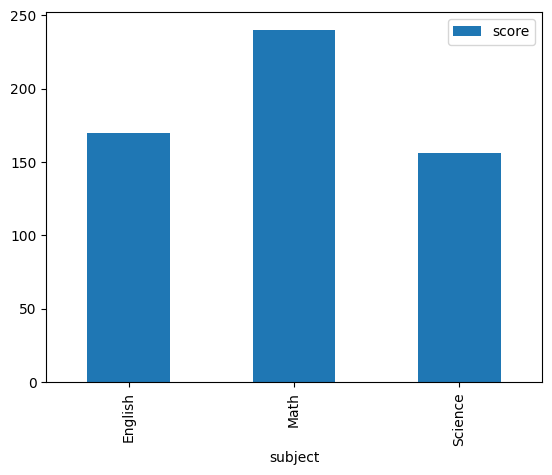

In [ ]:
student_score_classromm.groupby("subject").agg("sum").plot(kind="bar", y= "score")

#filtering join

In [5]:
student_score = student.merge(score, on="student_id",
                            how='left', indicator=True)  #indicator gives _merge column
print(student_score)


   student_id student_name  age  gender  subject  score _merge
0         101        Alice   20  Female     Math     88   both
1         101        Alice   20  Female  Science     81   both
2         102          Bob   22    Male  Science     75   both
3         102          Bob   22    Male     Math     85   both
4         103      Charlie   21    Male  English     92   both
5         104        David   23    Male     Math     67   both
6         105          Eva   22  Female  English     78   both


In [6]:
st_id_list = student.loc[student_score["_merge"] == "both", "student_id"]
print(st_id_list)

0    101
1    102
2    103
3    104
4    105
Name: student_id, dtype: int64


In [7]:
print(student[student["student_id"].isin(st_id_list)])

   student_id student_name  age  gender
0         101        Alice   20  Female
1         102          Bob   22    Male
2         103      Charlie   21    Male
3         104        David   23    Male
4         105          Eva   22  Female


In [11]:
#merge scoere and classroom
score_class = score.merge(classroom, on="subject", how="inner")
print(score_class)

   student_id  subject  score teacher_name classroom
0         101     Math     88    Mr.Sharma      A101
1         102  Science     75     Ms.Karki      B202
2         103  English     92    Mrs.Joshi      C303
3         101  Science     81     Ms.Karki      B202
4         104     Math     67    Mr.Sharma      A101
5         105  English     78    Mrs.Joshi      C303
6         102     Math     85    Mr.Sharma      A101


In [12]:
# Use .isin() to subset
top_studet = score[score['subject'].isin(score_class["subject"])]
print(top_studet)

   student_id  subject  score
0         101     Math     88
1         102  Science     75
2         103  English     92
3         101  Science     81
4         104     Math     67
5         105  English     78
6         102     Math     85


In [13]:
cnt_by_id = top_studet.groupby(['student_id'], as_index=False).agg({'subject':"count"})
print(cnt_by_id)

   student_id  subject
0         101        2
1         102        2
2         103        1
3         104        1
4         105        1


In [14]:
# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_id.merge(student, on="student_id"))

   student_id  subject student_name  age  gender
0         101        2        Alice   20  Female
1         102        2          Bob   22    Male
2         103        1      Charlie   21    Male
3         104        1        David   23    Male
4         105        1          Eva   22  Female


#concatenate vertically

In [18]:
student_by_score = pd.concat([student, score])
print(student_by_score)

   student_id student_name   age  gender  subject  score
0         101        Alice  20.0  Female      NaN    NaN
1         102          Bob  22.0    Male      NaN    NaN
2         103      Charlie  21.0    Male      NaN    NaN
3         104        David  23.0    Male      NaN    NaN
4         105          Eva  22.0  Female      NaN    NaN
0         101          NaN   NaN     NaN     Math   88.0
1         102          NaN   NaN     NaN  Science   75.0
2         103          NaN   NaN     NaN  English   92.0
3         101          NaN   NaN     NaN  Science   81.0
4         104          NaN   NaN     NaN     Math   67.0
5         105          NaN   NaN     NaN  English   78.0
6         102          NaN   NaN     NaN     Math   85.0


In [19]:
import pandas as pd

# Table 1: English scores
english = pd.DataFrame({
    "student_id": [101, 103],
    "subject": ["English", "English"],
    "score": [92, 85]
})

# Table 2: Math scores
math = pd.DataFrame({
    "student_id": [101, 102, 103],
    "subject": ["Math", "Math", "Math"],
    "score": [88, 75, 70]
})


In [20]:
combined_scores = pd.concat([english, math], ignore_index=True)
print(combined_scores)


   student_id  subject  score
0         101  English     92
1         103  English     85
2         101     Math     88
3         102     Math     75
4         103     Math     70


In [23]:
combined_side_by_side = pd.concat([english, math], keys=["English", "Math"])
print(combined_side_by_side)

                    subject  score
        student_id                
English 101         English     92
        103         English     85
Math    101            Math     88
        102            Math     75
        103            Math     70


In [27]:
student.merge(score, on="student_id", how="inner", validate="one_to_many")
#validating a merge

,student_id,student_name,age,gender,subject,score
0,101,Alice,20,Female,Math,88
1,101,Alice,20,Female,Science,81
2,102,Bob,22,Male,Science,75
3,102,Bob,22,Male,Math,85
4,103,Charlie,21,Male,English,92
5,104,David,23,Male,Math,67
6,105,Eva,22,Female,English,78


In [28]:
#merge_ordered()

# Stock price table 1
stock_a = pd.DataFrame({
    "date": ["2024-01-01", "2024-01-03", "2024-01-05"],
    "price_a": [100, 102, 105]
})

# Stock price table 2
stock_b = pd.DataFrame({
    "date": ["2024-01-02", "2024-01-03", "2024-01-04"],
    "price_b": [200, 202, 204]
})

# Merge while maintaining order by date
merged = pd.merge_ordered(stock_a, stock_b, on="date", how="outer")

print(merged)


         date  price_a  price_b
0  2024-01-01    100.0      NaN
1  2024-01-02      NaN    200.0
2  2024-01-03    102.0    202.0
3  2024-01-04      NaN    204.0
4  2024-01-05    105.0      NaN


In [30]:
student_score = pd.merge_ordered(student, score,  on="student_id", fill_method="ffill")
print(student_score)


   student_id student_name  age  gender  subject  score
0         101        Alice   20  Female     Math     88
1         101        Alice   20  Female  Science     81
2         102          Bob   22    Male  Science     75
3         102          Bob   22    Male     Math     85
4         103      Charlie   21    Male  English     92
5         104        David   23    Male     Math     67
6         105          Eva   22  Female  English     78


In [32]:
result = pd.merge_ordered(student_score,classroom,on="subject", fill_method="ffill")
print(result)


   student_id student_name  age  gender  subject  score teacher_name classroom
0         103      Charlie   21    Male  English     92    Mrs.Joshi      C303
1         105          Eva   22  Female  English     78    Mrs.Joshi      C303
2         101        Alice   20  Female     Math     88    Mr.Sharma      A101
3         102          Bob   22    Male     Math     85    Mr.Sharma      A101
4         104        David   23    Male     Math     67    Mr.Sharma      A101
5         104        David   23    Male   Nepali     67      Mr.Lama      D404
6         101        Alice   20  Female  Science     81     Ms.Karki      B202
7         102          Bob   22    Male  Science     75     Ms.Karki      B202


#merge_asof()

In [33]:

import pandas as pd

# Student table with timestamp (like enrollment date)
student = pd.DataFrame({
    "student_id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"],
    "enroll_date": ["2023-01-01", "2023-01-05", "2023-01-08"]
})
student["enroll_date"] = pd.to_datetime(student["enroll_date"])

# Score table with timestamps
score = pd.DataFrame({
    "student_id": [1, 1, 2, 3],
    "score_date": ["2023-01-10", "2023-01-20", "2023-01-11", "2023-01-25"],
    "subject": ["Math", "English", "Science", "Math"],
    "score": [88, 92, 76, 85]
})
score["score_date"] = pd.to_datetime(score["score_date"])


In [34]:
student = student.sort_values("enroll_date")
score = score.sort_values("score_date")


In [36]:
merged = pd.merge_asof(
    score,
    student,
    left_on="score_date",
    right_on="enroll_date",
    by="student_id",
    direction="backward"
)
print(merged)


   student_id score_date  subject  score     name enroll_date
0           1 2023-01-10     Math     88    Alice  2023-01-01
1           2 2023-01-11  Science     76      Bob  2023-01-05
2           1 2023-01-20  English     92    Alice  2023-01-01
3           3 2023-01-25     Math     85  Charlie  2023-01-08


#query

In [40]:
score.query("score > 50")

,student_id,score_date,subject,score
0,1,2023-01-10,Math,88
2,2,2023-01-11,Science,76
1,1,2023-01-20,English,92
3,3,2023-01-25,Math,85


In [45]:
score.query("score > 50 and score <90")

,student_id,score_date,subject,score
0,1,2023-01-10,Math,88
2,2,2023-01-11,Science,76
3,3,2023-01-25,Math,85
